In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from kmeans import KMeans as MyKMeans

# Digits dataset
Randomly initialized kmeans tends to perform poorly so we need to do a lot of repetition (n_init)

In [3]:
# digits
x_digits, y_digits = load_digits(return_X_y=True)
digits_scaler = StandardScaler().fit(x_digits)
x_digits = digits_scaler.transform(x_digits)
x_digits_reduced = TSNE(n_components=2).fit_transform(x_digits)
x_digits.shape, y_digits.shape

((1797, 64), (1797,))

inertia 69877.37011386587


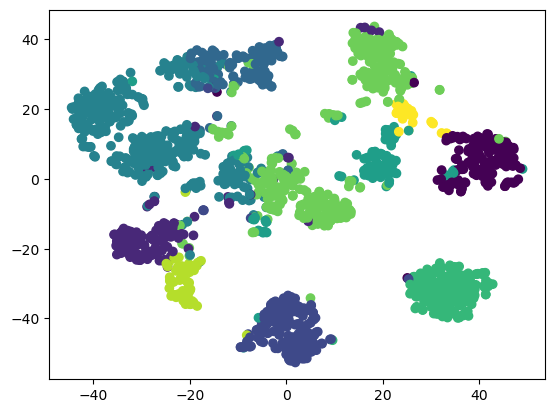

In [4]:
kmeans = KMeans(n_clusters=10, init="random", n_init=3, max_iter=100, tol=0.0001)
kmeans.fit(x_digits)
y_pred = kmeans.predict(x_digits)
print("inertia", kmeans.inertia_)
plt.scatter(x_digits_reduced[:, 0], x_digits_reduced[:, 1], c=y_pred)
plt.show()

my inertia 69972.69332890042


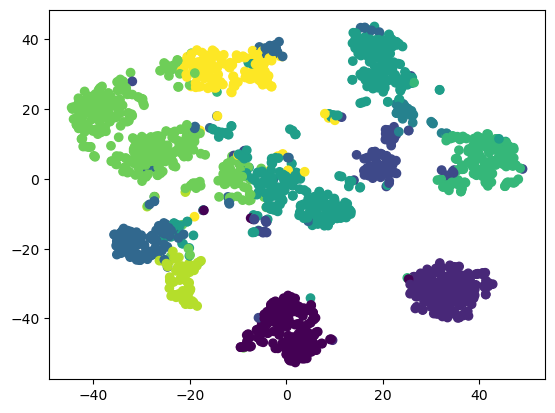

In [5]:
my_kmeans = MyKMeans(n_clusters=10, init="random", n_init=3, max_iter=100, tol=0.0001)
my_kmeans.fit(x_digits)
my_y_pred = my_kmeans.predict(x_digits)
print("my inertia", my_kmeans.inertia_)
plt.scatter(x_digits_reduced[:, 0], x_digits_reduced[:, 1], c=my_y_pred)
plt.show()

# Blobs (artificial) dataset
k-means++ choose centroids in a smart way so we need only a few repetitions (n_init)

In [6]:
# blobs
x_blobs, y_blobs = make_blobs(100, centers=4, random_state=7)
blobs_scaler = StandardScaler().fit(x_blobs)
x_blobs = blobs_scaler.transform(x_blobs)
x_blobs.shape, y_blobs.shape

((100, 2), (100,))

inertia 5.587060261094131


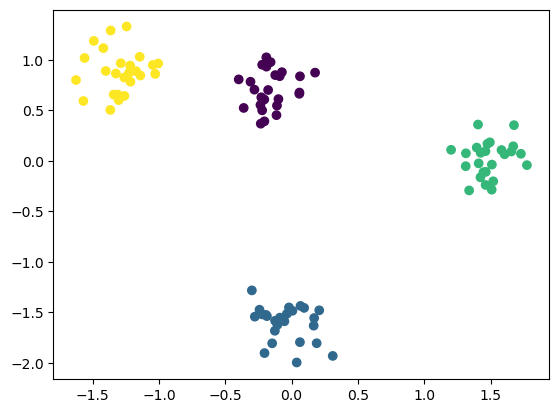

In [7]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=1, max_iter=100, tol=0.0001)
kmeans.fit(x_blobs)
y_pred = kmeans.predict(x_blobs)
print("inertia", kmeans.inertia_)
plt.scatter(x_blobs[:, 0], x_blobs[:, 1], c=y_pred)
plt.show()

my inertia 5.5870602610941305


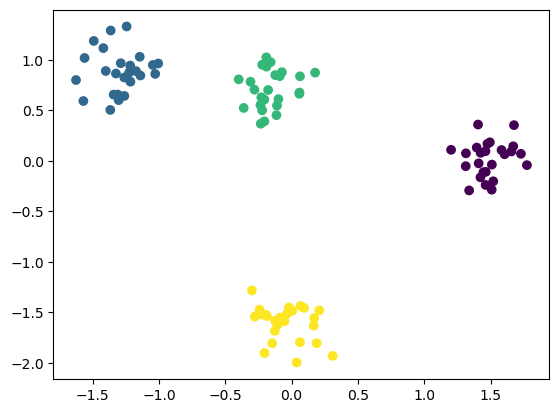

In [8]:
my_kmeans = MyKMeans(n_clusters=4, init="k-means++", n_init=1, max_iter=100, tol=0.0001)
my_kmeans.fit(x_blobs)
my_y_pred = my_kmeans.predict(x_blobs)
print("my inertia", my_kmeans.inertia_)
plt.scatter(x_blobs[:, 0], x_blobs[:, 1], c=my_y_pred)
plt.show()